<a href="https://colab.research.google.com/github/CarSandoval/Grafos/blob/main/02_AlgoritmosDeGrafosEnPython_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Algotirmo Dijkstra

En la teoría de grafos, el problema del camino más corto consiste en identificar la secuencia de aristas entre dos vértices cuya suma de pesos sea mínima. Este camino óptimo, a veces llamado geodésica, puede no ser único. Su relevancia práctica es amplia, aplicándose, por ejemplo, en la determinación de la ruta más rápida entre ciudades en un mapa, donde las ciudades son los vértices, las carreteras las aristas, y el tiempo de viaje su peso.

**`Algoritmos de resolución`**
Existen diversos algoritmos que permiten solucionar el problema de hallar el camino más corto, a continuación citamos algunos:



*   Algoritmo de Bellman - Ford.
*   Algoritmo de Búsqueda A*.
*   Algoritmo de Floyd - Warshall.
*   Algoritmo de Dijkstra.





En esta ocasió vamos a centrarnos en estudiar el último método de resolución llamado *Algoritmo de Dijkstra*

## **Algoritmo de Dijkstra**
El algoritmo de Dijkstra, también llamado algoritmo de caminos mínimos, es un algoritmo para la determinación del camino más corto, dado un vértice origen, hacia el resto de los vértices en un grafo que tiene pesos en cada arista. Su nombre alude a Edsger Dijkstra, científico de la computación de los Países Bajos que lo concibió en 1956 y lo publicó por primera vez en 1959.

# **¿En qué consiste el método?**
La idea subyacente en este algoritmo consiste en ir explorando todos los caminos más cortos que parten del vértice origen y que llevan a todos los demás vértices; cuando se obtiene el camino más corto desde el vértice origen hasta el resto de los vértices que componen el grafo, el algoritmo se detiene. Se trata de una especialización de la búsqueda de costo uniforme y, como tal, no funciona en grafos con aristas de coste negativo (al elegir siempre el nodo con distancia menor, pueden quedar excluidos de la búsqueda nodos que en próximas iteraciones bajarían el costo general del camino al pasar por una arista con costo negativo).

Algoritmo

Teniendo un grafo dirigido ponderado de N nodos no aislados, sea x el nodo inicial.
Un vector D de tamaño N guardará al final del algoritmo las distancias desde x hasta el resto de los nodos.

1. Inicializar todas las distancias en D con un valor infinito relativo, ya que son desconocidas al principio, exceptuando la de x, que se debe colocar en 0, debido a que la distancia de x a x sería 0.

2. Sea $a = x$ (Se toma a como nodo actual).

3. Se recorren todos los nodos adyacentes de a, excepto los nodos marcados.
Se les llamará nodos no marcados $v_i$.
	​


4. Para el nodo actual, se calcula la distancia tentativa desde dicho nodo hasta sus vecinos con la siguiente fórmula:



  $dt(vᵢ) = D_a + d(a, vᵢ)$

Es decir, la distancia tentativa del nodo vᵢ es la distancia que actualmente tiene el nodo en el vector D más la distancia desde dicho nodo a (el actual) hasta el nodo vᵢ.

Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa.
Es decir, si $dt(vᵢ) < D_{vᵢ}$, entonces:

$  D_{v_i} = \text{dt}(v_i)$

5. Se marca como completo el nodo \(a\).

6. Se toma como próximo nodo actual el de menor valor en \(D\) (puede hacerse almacenando los valores en una cola de prioridad) y se regresa al paso 3, mientras existan nodos no marcados.


# **Complejidad**

El orden de complejidad del algoritmo es:

$O(|V|^2 + |A|) = O(|V|^2)$ \quad (sin utilizar cola de prioridad),

$O((|A| + |V|) \log |V|) = O(|A| \log |V|)$  (utilizando cola de prioridad),

$O(|V| \log |V| + |A|)$ (si se utiliza un montículo de Fibonacci).

La complejidad computacional del algoritmo de Dijkstra se puede calcular contando las operaciones realizadas:

   1. El algoritmo consiste en \(n-1\) iteraciones, como máximo.
    En cada iteración, se añade un vértice al conjunto distinguido.
    
  2. En cada iteración, se identifica el vértice con la menor etiqueta entre los que no están en $(S_k)$. El número de estas operaciones está acotado por $n-1$.
    
  3. Además, se realizan una suma y una comparación para actualizar la etiqueta de cada uno de los vértices que no están en ($S_k$).

Luego, en cada iteración se realizan a lo sumo $2(n-1)$ operaciones.




# **Teorema**
El algoritmo de Dijkstra realiza $O(n^2)$ operaciones (sumas y comparaciones) para determinar la longitud del camino más corto entre dos vértices de un grafo ponderado simple, conexo y no dirigido, con \(n\) vértices.

En general
El tiempo de ejecución puede expresarse como:
$O(|A| \cdot T_{\text{dk}} + |V| \cdot T_{\text{dm}})$

donde:
\begin{align*}
|A| & : \text{Número de aristas} \\
T_{\text{dk}} & : \text{Complejidad de disminuir clave} \\
|V| & : \text{Número de vértices} \\
T_{\text{dm}} & : \text{Complejidad de extraer mínimo}
\end{align*}





In [ ]:
import heapq

def dijkstra(graph, start, end):
    """
    Calcula el camino más corto en un grafo ponderado con pesos no negativos
    usando el Algoritmo de Dijkstra.

    Args:
        graph (dict): Representación del grafo (diccionario de adyacencia).
                      Ej: {'A': [('B', 7), ('D', 5)], ...}
        start (str): Nodo de inicio.
        end (str): Nodo de destino.

    Returns:
        tuple: (distancia_corta, camino_corta)
               Devuelve (inf, None) si no hay camino.
    """
    # 1. Inicialización
    # Distancias: {nodo: distancia_minima}
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Predecesores para reconstruir el camino: {nodo: predecesor}
    predecessors = {node: None for node in graph}

    # Cola de Prioridad: (distancia, nodo)
    # Almacena los nodos a visitar, priorizando el de menor distancia.
    priority_queue = [(0, start)]

    # 2. Bucle principal
    while priority_queue:
        # Extraer el nodo con la distancia más pequeña
        current_distance, current_node = heapq.heappop(priority_queue)

        # Ignorar si ya encontramos un camino más corto (optimización)
        if current_distance > distances[current_node]:
            continue

        # 3. Explorar vecinos
        # Los vecinos se representan como tuplas (neighbor, weight)
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            # 4. Relajación (actualizar distancia si encontramos un camino más corto)
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node # Guardar el predecesor
                heapq.heappush(priority_queue, (distance, neighbor))

    # 5. Reconstruir el camino más corto al nodo 'end'
    path = []
    current = end

    # Si la distancia es 'infinito', no hay camino
    if distances[end] == float('inf'):
        return (float('inf'), None)

    while current is not None:
        path.append(current)
        current = predecessors[current]

    # El camino se construyó al revés, lo invertimos
    shortest_path = path[::-1]

    return (distances[end], shortest_path)

# --- Ejemplo de Uso ---

# Definición del grafo:
# Las claves son los nodos. Los valores son listas de tuplas (vecino, peso de arista).
graph_data = {
    'A': [('B', 7), ('D', 5)],
    'B': [('A', 7), ('C', 8), ('D', 9), ('E', 7)],
    'C': [('B', 8), ('E', 5)],
    'D': [('A', 5), ('B', 9), ('E', 15), ('F', 6)],
    'E': [('B', 7), ('C', 5), ('D', 15), ('F', 8), ('G', 9)],
    'F': [('D', 6), ('E', 8), ('G', 11)],
    'G': [('E', 9), ('F', 11)]
}

start_node = 'A'
end_node = 'G'

shortest_distance, shortest_path = dijkstra(graph_data, start_node, end_node)

print(f"Distancia más corta de {start_node} a {end_node}: {shortest_distance}")
print(f"Camino más corto: {shortest_path}")

# Ejemplo de un nodo inaccesible (ej. de A a 'Z')
# shortest_distance, shortest_path = dijkstra(graph_data, 'A', 'Z')
# print(f"\nDistancia más corta de A a Z: {shortest_distance}")
# print(f"Camino más corto: {shortest_path}")


Distancia más corta de A a G: 22
Camino más corto: ['A', 'D', 'F', 'G']


 *Ejemplo: Calculemos la distancia del municipio de Sinaloa al municipio del Rosario.*


=== CAMINO MÁS CORTO ENTRE CULIACÁN Y EL ROSARIO ===
Origen: Culiacan
Destino: El Rosario
Distancia total: 265 km
Ruta: Culiacan -> Navolato -> Cosala -> San Ignacio -> Escuinapa -> El Rosario

=== VERIFICACIÓN CON NETWORKX ===
Ruta NetworkX: Culiacan -> Navolato -> Cosala -> San Ignacio -> Escuinapa -> El Rosario
Distancia NetworkX: 265 km


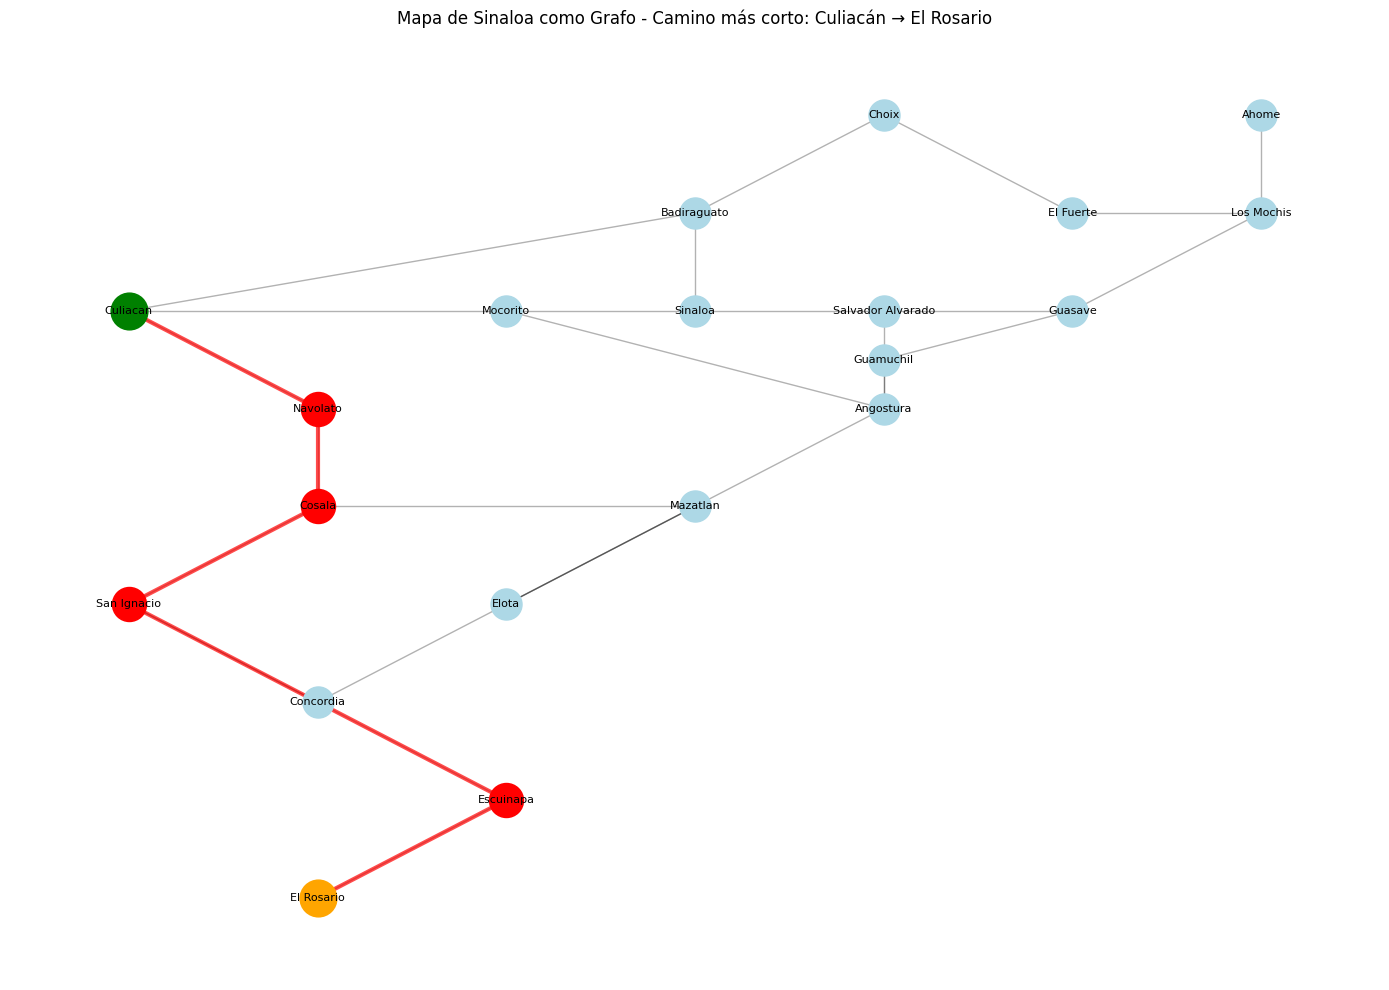


=== INFORMACIÓN ADICIONAL ===
Número total de municipios: 20
Número total de conexiones: 25
Grado de Culiacán: 3 conexiones
Grado de El Rosario: 1 conexiones


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Crear el grafo del estado de Sinaloa
sinaloa = nx.Graph()

# Agregar municipios como nodos (con coordenadas aproximadas para visualización)
municipios = {
    'Culiacan': (0, 4),
    'Mazatlan': (3, 2),
    'Los Mochis': (6, 5),
    'Guasave': (5, 4),
    'Navolato': (1, 3),
    'El Fuerte': (5, 5),
    'Ahome': (6, 6),
    'Choix': (4, 6),
    'Elota': (2, 1),
    'Mocorito': (2, 4),
    'Angostura': (4, 3),
    'Badiraguato': (3, 5),
    'Concordia': (1, 0),
    'Cosala': (1, 2),
    'Escuinapa': (2, -1),
    'San Ignacio': (0, 1),
    'Sinaloa': (3, 4),
    'Salvador Alvarado': (4, 4),
    'Guamuchil': (4, 3.5),
    'El Rosario': (1, -2)
}

# Agregar nodos al grafo
for municipio, coords in municipios.items():
    sinaloa.add_node(municipio, pos=coords)

# Agregar conexiones entre municipios (con distancias aproximadas en km)
conexiones = [
    # Conexiones desde Culiacán
    ('Culiacan', 'Navolato', 35),
    ('Culiacan', 'Mocorito', 80),
    ('Culiacan', 'Badiraguato', 120),

    # Conexiones de la zona norte
    ('Los Mochis', 'Guasave', 45),
    ('Los Mochis', 'Ahome', 15),
    ('Los Mochis', 'El Fuerte', 60),
    ('Guasave', 'Salvador Alvarado', 25),
    ('Guasave', 'Guamuchil', 20),
    ('El Fuerte', 'Choix', 90),
    ('Choix', 'Badiraguato', 110),

    # Conexiones zona centro
    ('Mocorito', 'Sinaloa', 40),
    ('Mocorito', 'Angostura', 70),
    ('Sinaloa', 'Badiraguato', 85),
    ('Sinaloa', 'Salvador Alvarado', 35),
    ('Salvador Alvarado', 'Angostura', 30),
    ('Angostura', 'Guamuchil', 25),

    # Conexiones hacia Mazatlán
    ('Angostura', 'Elota', 50),
    ('Elota', 'Mazatlan', 40),
    ('Mazatlan', 'Concordia', 45),
    ('Mazatlan', 'Cosala', 85),

    # Conexiones hacia El Rosario
    ('Concordia', 'San Ignacio', 30),
    ('San Ignacio', 'Escuinapa', 40),
    ('Escuinapa', 'El Rosario', 35),
    ('Cosala', 'San Ignacio', 60),
    ('Navolato', 'Cosala', 95)
]

# Agregar aristas al grafo
for origen, destino, distancia in conexiones:
    sinaloa.add_edge(origen, destino, weight=distancia)

# Función para calcular distancia euclidiana (para heurística)
def distancia_euclidiana(node1, node2):
    pos1 = municipios[node1]
    pos2 = municipios[node2]
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

# Implementación del algoritmo Dijkstra
def dijkstra(grafo, origen, destino):
    # Estructuras para el algoritmo
    distancias = {nodo: float('inf') for nodo in grafo.nodes()}
    distancias[origen] = 0
    predecesores = {}
    nodos_no_visitados = set(grafo.nodes())

    while nodos_no_visitados:
        # Encontrar el nodo con la distancia mínima
        nodo_actual = min(nodos_no_visitados, key=lambda nodo: distancias[nodo])

        # Si llegamos al destino o no hay camino
        if distancias[nodo_actual] == float('inf'):
            break

        if nodo_actual == destino:
            break

        nodos_no_visitados.remove(nodo_actual)

        # Actualizar distancias de vecinos
        for vecino in grafo.neighbors(nodo_actual):
            if vecino in nodos_no_visitados:
                peso = grafo[nodo_actual][vecino]['weight']
                nueva_distancia = distancias[nodo_actual] + peso

                if nueva_distancia < distancias[vecino]:
                    distancias[vecino] = nueva_distancia
                    predecesores[vecino] = nodo_actual

    # Reconstruir el camino
    camino = []
    nodo_actual = destino

    while nodo_actual in predecesores:
        camino.insert(0, nodo_actual)
        nodo_actual = predecesores[nodo_actual]

    if camino or origen == destino:
        camino.insert(0, origen)

    return camino, distancias[destino]

# Calcular el camino más corto
origen = 'Culiacan'
destino = 'El Rosario'

camino, distancia_total = dijkstra(sinaloa, origen, destino)

# Visualizar el resultado
print("=== CAMINO MÁS CORTO ENTRE CULIACÁN Y EL ROSARIO ===")
print(f"Origen: {origen}")
print(f"Destino: {destino}")
print(f"Distancia total: {distancia_total} km")
print(f"Ruta: {' -> '.join(camino)}")

# También podemos usar NetworkX para verificar
camino_nx = nx.shortest_path(sinaloa, source=origen, target=destino, weight='weight')
distancia_nx = nx.shortest_path_length(sinaloa, source=origen, target=destino, weight='weight')

print("\n=== VERIFICACIÓN CON NETWORKX ===")
print(f"Ruta NetworkX: {' -> '.join(camino_nx)}")
print(f"Distancia NetworkX: {distancia_nx} km")

# Visualización del grafo
plt.figure(figsize=(14, 10))
pos = nx.get_node_attributes(sinaloa, 'pos')

# Dibujar el grafo completo
nx.draw_networkx_nodes(sinaloa, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(sinaloa, pos, font_size=8)
nx.draw_networkx_edges(sinaloa, pos, alpha=0.3)

# Resaltar el camino más corto
edges_camino = [(camino[i], camino[i+1]) for i in range(len(camino)-1)]
nx.draw_networkx_edges(sinaloa, pos, edgelist=edges_camino,
                      edge_color='red', width=3, alpha=0.7)
nx.draw_networkx_nodes(sinaloa, pos, nodelist=camino,
                      node_color='red', node_size=600)

# Resaltar origen y destino
nx.draw_networkx_nodes(sinaloa, pos, nodelist=[origen],
                      node_color='green', node_size=700)
nx.draw_networkx_nodes(sinaloa, pos, nodelist=[destino],
                      node_color='orange', node_size=700)

plt.title("Mapa de Sinaloa como Grafo - Camino más corto: Culiacán → El Rosario")
plt.axis('off')
plt.tight_layout()
plt.show()

# Información adicional
print("\n=== INFORMACIÓN ADICIONAL ===")
print(f"Número total de municipios: {len(sinaloa.nodes())}")
print(f"Número total de conexiones: {len(sinaloa.edges())}")
print(f"Grado de Culiacán: {sinaloa.degree['Culiacan']} conexiones")
print(f"Grado de El Rosario: {sinaloa.degree['El Rosario']} conexiones")